<a href="https://colab.research.google.com/github/Matinzr/PracticeProjects/blob/main/Unicorn%20Analyzing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#set the directory
import os
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Set the desired folder as your working directory
os.chdir('/content/drive/My Drive/Datasets/UnicornCompanyDataset')

# Verify your current working directory
!pwd

Mounted at /content/drive
/content/drive/My Drive/Datasets/UnicornCompanyDataset



## Introduction
In this activity, I will discover characteristics of a dataset and use visualizations to analyze the data. This will develop and strengthen my skills in exploratory data analysis (EDA) and my knowledge of functions that allow me I would provide insights to an investing firm. To help them decide which companies to invest in next, the firm wants insights into unicorn companies–companies that are valued at over one billion dollars. The data I will use for this task provides information on over 1,000 unicorn companies, including their industry, country, year founded, and select investors. I will use this information to gain insights into how and when companies reach this prestigious milestone and to make recommendations for next steps to the investing firm.

In [3]:
# Import packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
#Read the file
companies = pd.read_csv('Unicorn_Companies.csv')
companies.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [5]:
#Assess the dataset's size
companies.size

10740

In [6]:
#Determine the shape
companies.shape

(1074, 10)

In [7]:
#Have a glance on dataset
companies.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


<ipython-input-7-0231eed5dddb>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  companies.info(null_counts=True)


In [8]:
#Find descriptive statistics

companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [9]:
#Let's convert "Date Joined" obj-> datetime
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [10]:
#Create a "Year Joined" column for further analysis
companies['Year Joined'] = companies['Date Joined'].dt.year
companies.head(3)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018


In [11]:
#Result & Evaluation

#sample the data

companies_sampled = companies.sample(n = 50, random_state= 42)
companies_sampled.head(5)


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017


### Now it's time to visualize the time it took companies to reach unicorn status

In [12]:
#prepare data for plotting
#Create new column "Duration" that shows how long takes for a company to become unicorn

companies_sampled['Duration Time'] = companies_sampled['Year Joined'] - companies_sampled['Year Founded']
companies_sampled.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Duration Time
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5


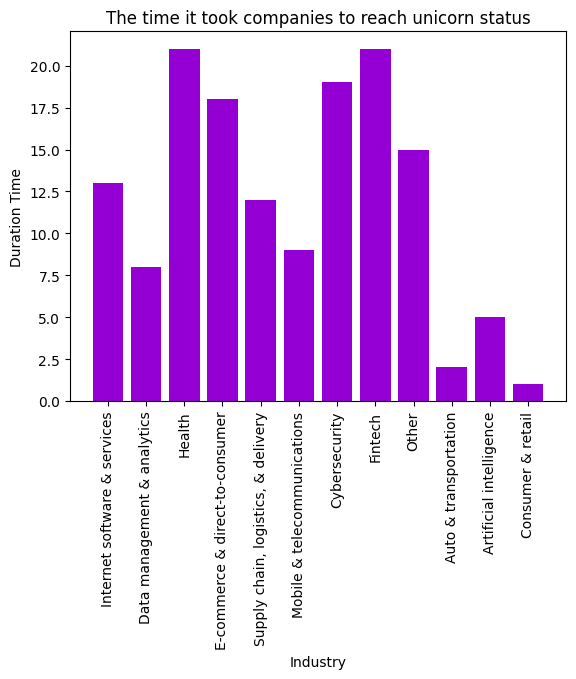

In [21]:
#Create the Plot

plt.bar(x= companies_sampled['Industry'], height=companies_sampled['Duration Time'], label= "Time takes for companies to become Unicorn", color="darkviolet")

#Set title

plt.title('The time it took companies to reach unicorn status')

#Set x-axis label

plt.xlabel("Industry")


#Set y-axis label

plt.ylabel("Duration Time")


#Rotate labels on the x-axis as a way to avoid overlap in the positions of the text

plt.xticks(rotation=90)


#Display the plot

plt.show()

### Let's check the maximum unicorn company valuation per industries

In [14]:
#create a column from valuation to represent numeric number for each company

companies_sampled['Num_valuation'] = companies_sampled['Valuation'].str.extract('(\d+\.\d+|\d+)').astype(float)
#Use regular expression in order to seprate numeric from object values
#Use '(\d+\.\d+|\d+)' instead of '(\d+)' because I wasn't sure we
#have decimal on our values or not to I wanted to extract all the number

new_df_companies_sampled = companies_sampled.groupby(['Industry'])['Num_valuation'].max().sort_values(ascending= False).reset_index()
new_df_companies_sampled

,Industry,Num_valuation
0,Artificial intelligence,12.0
1,Fintech,10.0
2,Mobile & telecommunications,7.0
3,Internet software & services,5.0
4,Data management & analytics,4.0
5,E-commerce & direct-to-consumer,4.0
6,Cybersecurity,3.0
7,Health,3.0
8,Other,2.0
9,"Supply chain, logistics, & delivery",2.0


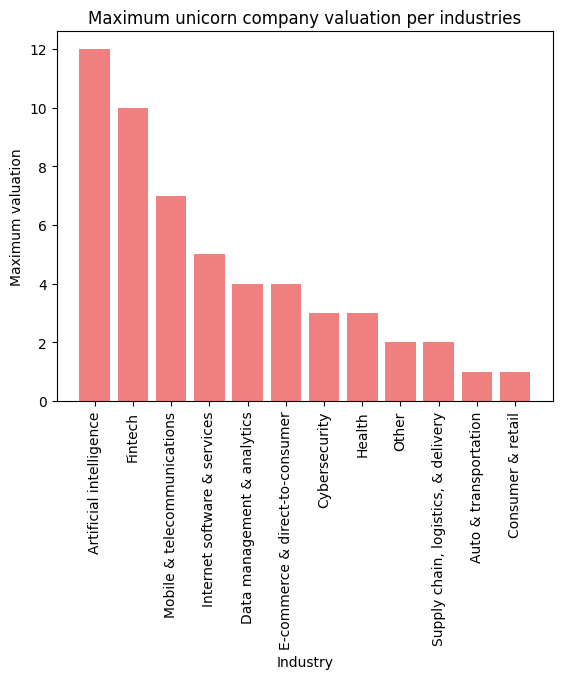

In [15]:
#Create the plot

plt.bar(x= new_df_companies_sampled['Industry'], height = new_df_companies_sampled['Num_valuation'],
        label ='Maximum unicorn company valuation per industries', color='lightcoral' )


# Set title

plt.title('Maximum unicorn company valuation per industries')


# Set x-axis label

plt.xlabel('Industry')


# Set y-axis label

plt.ylabel('Maximum valuation')

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text

plt.xticks(rotation=90)


# Display the plot

plt.show()


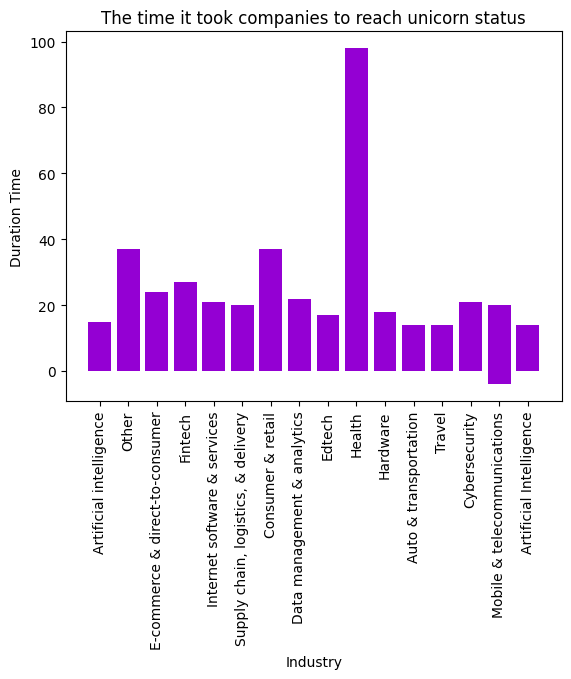

In [17]:
#Plotting without Sample

companies['Duration Time'] = companies['Year Joined'] - companies['Year Founded']

#Create the Plot

plt.bar(x= companies['Industry'], height=companies['Duration Time'], label= "Time takes for companies to become Unicorn", color="darkviolet")

#Set title

plt.title('The time it took companies to reach unicorn status')

#Set x-axis label

plt.xlabel("Industry")


#Set y-axis label

plt.ylabel("Duration Time")


#Rotate labels on the x-axis as a way to avoid overlap in the positions of the text

plt.xticks(rotation=90)


#Display the plot

plt.show()

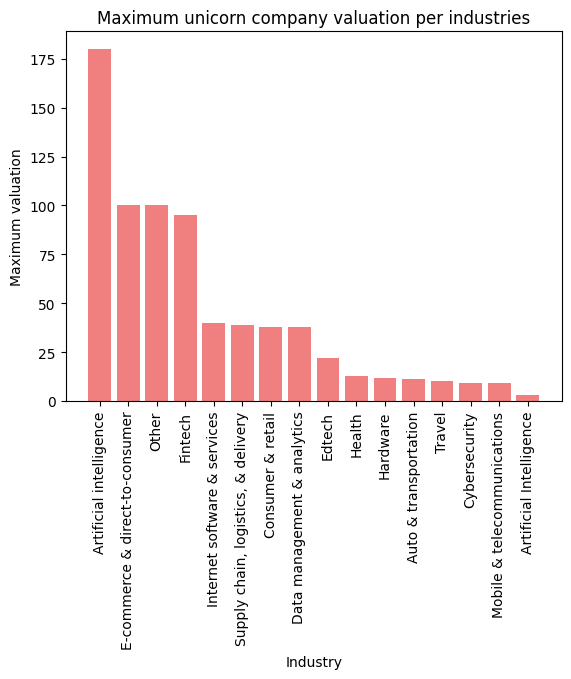

In [19]:
#create a column from valuation to represent numeric number for each company

companies['Num_valuation'] = companies['Valuation'].str.extract('(\d+\.\d+|\d+)').astype(float)
#Use regular expression in order to seprate numeric from object values
#Use '(\d+\.\d+|\d+)' instead of '(\d+)' because I wasn't sure we
#have decimal on our values or not to I wanted to extract all the number

new_df_companies = companies.groupby(['Industry'])['Num_valuation'].max().sort_values(ascending= False).reset_index()
new_df_companies

#Create the plot

plt.bar(x= new_df_companies['Industry'], height = new_df_companies['Num_valuation'],
        label ='Maximum unicorn company valuation per industries', color='lightcoral' )


# Set title

plt.title('Maximum unicorn company valuation per industries')


# Set x-axis label

plt.xlabel('Industry')


# Set y-axis label

plt.ylabel('Maximum valuation')

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text

plt.xticks(rotation=90)


# Display the plot

plt.show()

